<a href="https://colab.research.google.com/github/AlisonJD/RTACourse/blob/main/Tinybird_Events_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

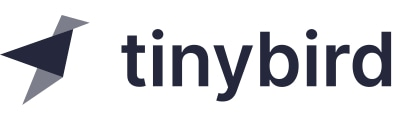
#Principles of Real-Time Analytics Course

#Tinybird Events Dataset
Synthetic data of 100 M rows of website events.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

% cd "/content/gdrive/My Drive/Colab Notebooks/Tinybird"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Tinybird


In [ ]:
!pip install tinybird-cli -q

     |████████████████████████████████| 71 kB 3.8 MB/s 
     |████████████████████████████████| 81 kB 8.6 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 61 kB 8.2 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!tb auth

Copy the admin token from https://ui.tinybird.co/tokens and paste it here: 
** Auth successful! 
** Configuration written to .tinyb file, consider adding it to .gitignore


Generate a data source file from the CSV URL.

In [ ]:
!tb datasource generate https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_1.csv

** Generated datasources/events_50M_1.datasource
** => Create it on the server running: $ tb push datasources/events_50M_1.datasource
** => Append data using: $ tb datasource append events_50M_1 https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_1.csv`



In [ ]:
!mv datasources/events_50M_1.datasource datasources/events.datasource

In [ ]:
!cat datasources/events.datasource

DESCRIPTION generated from https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_1.csv

SCHEMA >
    `date` DateTime,
    `product_id` String,
    `user_id` Int64,
    `event` String,
    `extra_data` String

Push the data source file to Tinybird.

In [ ]:
!tb push datasources/events.datasource

** Processing datasources/events.datasource
** Building dependencies
** Running events 
** 'events' created
** Not pushing fixtures


Add the data for the first 50 M rows.

In [ ]:
!tb datasource append events https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_1.csv

** 🥚 starting import process
** 🐥 done
** Total rows in events: 50000000
** Data appended to data source 'events' successfully!
** Data pushed to events


Add the data for the next 50 M rows.

In [ ]:
!tb datasource append events https://storage.googleapis.com/tinybird-assets/datasets/guides/events_50M_2.csv

** 🥚 starting import process
** 🐥 done
** Total rows in events: 100000000
** Data appended to data source 'events' successfully!
** Data pushed to events


Query your data.

In [ ]:
!tb sql --stats "SELECT count() FROM events"

** Query took 0.000252825 seconds
** Rows read: 1
** Bytes read: 4.1 KB
-------------
|   count() |
-------------
| 100000000 |
-------------
